#### Code for augmenting data from Kaggle  

In [ ]:
#split training data up for augmentation
import os
import glob
import shutil

from sklearn.model_selection import train_test_split 

input_dir = r'C:\Users\marie\OneDrive\Desktop\Brendan\renamed files\archive (14)\train - Copy' #directory files will be taken from, making copy of training data 

file_list = glob.glob(os.path.join(input_dir, '**', '*.jpg'), recursive=True) #get files from directory and subdirectory in input directory


#directories where the data used for training and data used for augmentation will be 
train_data  = r'C:\Users\marie\OneDrive\Desktop\Brendan\renamed files\archive (14)\train_data'
aug_data = r'C:\Users\marie\OneDrive\Desktop\Brendan\renamed files\archive (14)\aug_data'

train_files, test_files = train_test_split(file_list, train_size= 5500, random_state=42) #splitting up files so approx 2000 will be used for augmentation and keep rest for training

#copy training files to training dir
for file in train_files:
    rel_path = os.path.relpath(file, input_dir) #get relative path from input directory
    dest_path = os.path.join(train_data, rel_path) #destination wherefiles are to be copied too
    os.makedirs(os.path.dirname(dest_path), exist_ok=True) #create folders in destination path
    shutil.copy2(file, dest_path) #copy files to destination path

#copy augment files to test dir
for file in test_files:
    rel_path = os.path.relpath(file, input_dir)   #get relative path from input directory
    dest_path = os.path.join(aug_data, rel_path) #destination wherefiles are to be copied too
    os.makedirs(os.path.dirname(dest_path), exist_ok=True) #create folders in destination path
    shutil.copy2(file, dest_path) #copy files to destination pat

    

In [11]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import os

rootdir = r"C:\Users\marie\OneDrive\Desktop\Brendan\renamed files - 4 suits\archive (14)\aug_data" #root directory containing files to augment
output_dir = r"C:\Users\marie\OneDrive\Desktop\Brendan\renamed files - 4 suits\archive (14)\augment_data_2" #output directory containing augmented files


#ImageDatagenerator is applied to augment files using width and height shifts, rotation, brightness and zoom ranges
datagen = ImageDataGenerator(
    width_shift_range=0.05,
    height_shift_range=0.05,
    rotation_range=5,
    brightness_range=(0.8, 1.2),
    zoom_range=0.1
)


for subdir, dirs, files in os.walk(rootdir): #go through the sub directory in the folder containing files to be augmented
    for f in files:  #look through each file wthin the sub folders
        file_path = os.path.join(subdir, f)  #file path for each folder
        img = load_img(file_path) #load image     
        x = img_to_array(img) #convert image to array for keras
        x = x.reshape((1, ) + x.shape) #reshape array to add batch dim

        i = 0 #initilaise counter

        #generate augmented images using datagen
        for batch in datagen.flow(     
            x,
            batch_size=1, #augment 1 image at a time
            save_to_dir=output_dir,      #save file to output directory    
            save_prefix=os.path.splitext(f)[0],   #preserve file name
            save_format='jpeg' #preserve format
            ):
            i += 1 
            if i >= 1:  #only make 1 aumgented file per image                    
                break

### Code to extract log file data downloaded from Edge impulse containing accuracy and loss for training and validation sets so performance over epochs can be plotted

In [51]:
import re
import csv

text_file = r"C:\Users\marie\OneDrive\Desktop\Brendan\logs32048678.txt" #directory containing log file with accuracy info from Edge impulse


data_list = [] #setting up list for accuracy values
current_epoch = None #initilaising epoch

#open log file
with open(text_file, 'r') as file: 
    for line in file:
        line = line.strip()  #strip white space from lines in log file
        
        if "Epoch" in line and "/" in line:
            current_epoch = int(line.split()[1].split("/")[0]) #extract epoch number by splitting the line at  space and /

        elif "loss:" in line and "val_accuracy:" in line: #locate lines containing loss and accuracy for train and validation
            match = re.search(r'loss: ([0-9.]+) - accuracy: ([0-9.]+) - val_loss: ([0-9.]+) - val_accuracy: ([0-9.]+)', line) #extract metrics
            if match: #if metrics found
                data_list.append({      #add metrics to the list
                    'epoch': current_epoch,
                    'loss': float(match.group(1)),
                    'accuracy': float(match.group(2)),
                    'val_loss': float(match.group(3)),
                    'val_accuracy': float(match.group(4)),
                })

                 
#create csv file with data
with open('data.csv', 'w') as csv_file:  
    writer = csv.DictWriter(csv_file, fieldnames=data_list[0].keys()) #initialise dict writer with first metrics from data list
    writer.writeheader() #write header row to csv
    writer.writerows(data_list) #write data list to rows in csv




In [53]:
import pandas as pd

#read in csv file and explore first few values
df = pd.read_csv('dict.csv')
print(df.head()) 


   epoch    loss  accuracy  val_loss  val_accuracy
0      1  1.1133    0.4677    0.8739        0.5961
1      2  0.8278    0.6272    0.7305        0.6891
2      2  0.8278    0.6272    0.7305        0.6891
3      3  0.8278    0.6272    0.7305        0.6891
4      3  0.8278    0.6272    0.7305        0.6891


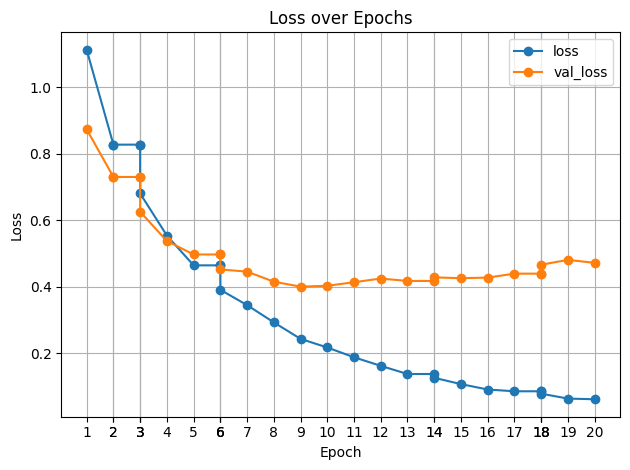

In [85]:
import matplotlib.pyplot as plt

#plot loss for train and validation 
df.plot(x='epoch', y=['loss', 'val_loss'],  marker='o')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss over Epochs')
plt.grid(True)
plt.xticks(df['epoch'])
plt.tight_layout()
plt.show()

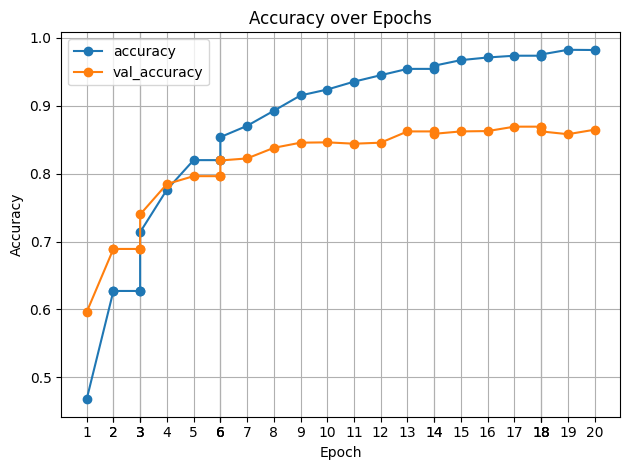

In [77]:
import matplotlib.pyplot as plt

#plot accuracy for train and validation
df.plot(x='epoch', y=['accuracy', 'val_accuracy'], marker='o') 
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.grid(True)
plt.xticks(df['epoch'])
plt.tight_layout()
plt.show()